<a href="https://colab.research.google.com/github/kylianmbappe9/Python-Machine-Learning-End-To-End-Projects/blob/main/lab2_Sarker_Saad_Ahmed_202202560.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Laboratory 2
# Skydiver problem


### Name:
### Student ID:

#### Instructions:

**Copy this notebook to your home folder then rename it to lab2YourName.ipynb with no spaces, eg lab2LevTarasov.ipynb**

**Complete the notebook by reading all of the markdown cells and filling in the *blanks*. In the code cells, you will need to replace with the correct code everywhere you see a '_'. You will also need to add new code as appropirate. Please complete this lab during the lab slot and ask for help from the instructor or the TA as often as needed.*

**When finished, copy the notebook to your assignDropbox.dir folder.**

This lab involves modelling a skydiver falling through the air.  Initially, air resistance is very small, but upon deployment of a parachute, air drag suddenly increases to a large value.  The mass of the jumper is 60kg, acceleration due to gravity is 9.81 m/s^2 , the jumper starts from a height of 1000m and opens the parachute at about 200m above the ground.  The jumper feels a drag force F=-k v |v|, where k changes to a high value after the parachute is opened.

## 1. Model the action of the parachute with a hyperbolic tangent


 To model the action of the parachute we will use the hyperbolic tangent function.  Plot np.tanh(x-5) from x=0 to 10.  Don't worry about making the graph look nice, but make sure the range of the graph goes from -1.2 to 1.2.

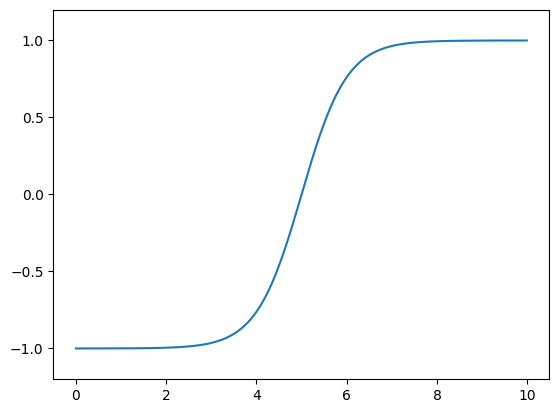

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.01)
y = np.tanh(x-5)

fig, axes = plt.subplots()
plt.ylim(-1.2, 1.2)

plt.plot(x, y)


As you can see from the graph, to a good approximation the function goes from one constant value to another.  Now plot the function 6 - 2 tanh( (x-5)/0.1 ) from $x$ = 0 to 10. Choose an appropriate range so that you can see both the top and bottom of your plot.

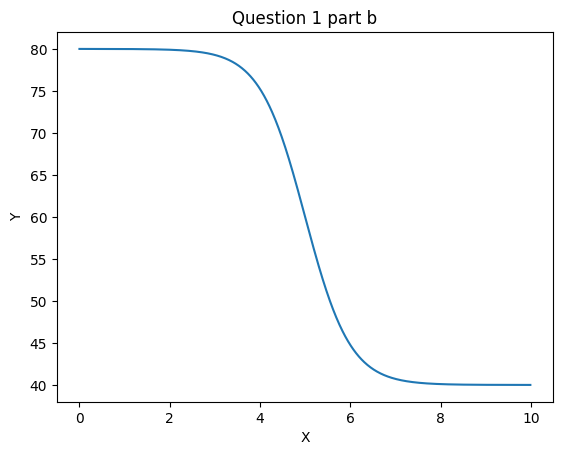

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(X):
    return (6-(2*np.tanh(x-5))) / (0.1)

x = np.arange(0, 10, 0.01)
y = f(x)

fig, axes = plt.subplots()


plt.plot(x, y)
plt.xlabel('X')

plt.ylabel('Y')
plt.title('Question 1 part b')
plt.show()


Notice how we have transformed the function so that it changes more abruptly, has a wider range and different end values.  Let's now choose appropriate parameters to model our system, and store them in variables

* m = 60  - mass of jumper in kg
* g = 9.81  - acceleration due to gravity
* h = 1000   - initial height in m
* y0 = 200  -  height at which the jumper opens the parachute
* kd = 0.48  -  drag coefficient without parachute in kg /m
* kp = 30.24 -  drag coefficient with parachute fully deployed
* d = 20  -  roughly the distance (m) the jumper falls during the parachute opening

In [ ]:
import math

m = 60
g = 9.81
h = 1000
y0 = 200
kd = 0.48
kp = 30.24
d = 20

Define a new Python function k(y) = kp - (kp-kd)/2 (1+tanh( 2 (y-y0)/d  )).  

k(y) is our mathematical model for the drag coefficient as a function of the jumper's height above the ground.

In [ ]:
def k(y):
    return kp - (kp - kd) / 2 * (1 + np.tanh(2 * (y - y0) / d))


Plot the function k(y), with y ranging from 0 to 1000.

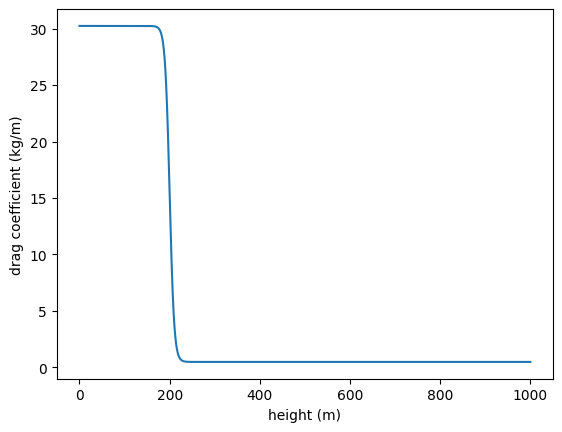

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y = np.arange(0, 1000, 0.1)

fig, axes = plt.subplots()
plt.xlabel("height (m)")
plt.ylabel("drag coefficient (kg/m)")
plt.plot(y, k(y))

Check your values for k(0) and k(1000).  They should be 30.24 and 0.48 respectively.  

k(0)  
k(1000)

In [ ]:
print(k(0), k(1000))

30.24 0.4800000000000004


## 2. Solving the problem numerically

 Now that we've modelled the skydiver problem with a height-varying drag coefficient, let's find the height and velocity as functions of time using Euler's method, assuming initial velocity of zero.

The equation that we want to solve is
$$ \frac{d^2y}{dt^2} = -g - k(y)/m \frac{dy}{dt} \left| \frac{dy}{dt} \right| \;, $$

along with appropriate initial conditions.

The first task is to rewrite this second-order differential equation as pair of two first-order differential equations by introducing $v = \frac{dy}{dt}$.

\begin{align}
\frac{dy}{dt} &= ?? \\
\frac{dv}{dt} &= ??
\end{align}

*Determine what should be on the right hand side and edit this Markdown cell to replace the question marks.*

Implement your numerical solution below using Euler's method.

### Computation routine

In [ ]:
#for units I wanted to use sympy but depending on the question, nothing about the units was said
#for simplicity purposes, I have not used sympy at this time
def compute():
    tmax = 400
    dt = 0.01
    g = 9.81
    m = 80
    h0 = 200

    N = round(tmax / dt)


    y = np.zeros(N)
    v = np.zeros(N)
    t = np.zeros(N)


    y[0] = y0
    v[0] = 0
    t[0] = 0

    # Solve using Euler's method
    for i in range(N-1):
        y[i+1] = y[i] + v[i] * dt
        v[i+1] = v[i] + (g - k(y[i]) / m) * (v[i]) * dt
        t[i+1] = t[i] + dt

        if y[i+1] <= 0:
            break

    # Truncate arrays to when skydiver has landed (y <= 0)
    N = i + 2
    y = y[:N]
    v = v[:N]
    t = t[:N]

    return y, v, t

Run your numerical model and plot the height $y$ vs time $t$.

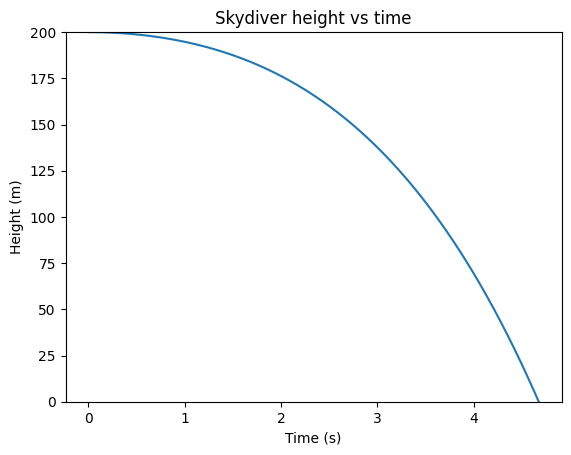

In [ ]:
y, v, t = compute()

# Plot the solution
fig, axes = plt.subplots()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Skydiver height vs time')
plt.ylim(0, np.max(y))  # Set y-axis limit to the maximum height value

plt.show()

## 3. Analysis of solution

Estimate the total time the skydiver spends in the air.

* *Easier (approximate) method: Use the plot to estimate time when when y = 0*
* *Harder (exact) method: Use linear interpolation to estimate the time when  time y = 0*
* *Your choice!*

In [ ]:
t_landing = 30
print("The skydiver lands after", t_landing, "s.")

The skydiver lands after 30 s.


Plot the velocity $v$ versus time $t$.  Remember to use good axes labels with units and add a title!

Text(0.5, 1.0, 'Skydiver velocity vs time')

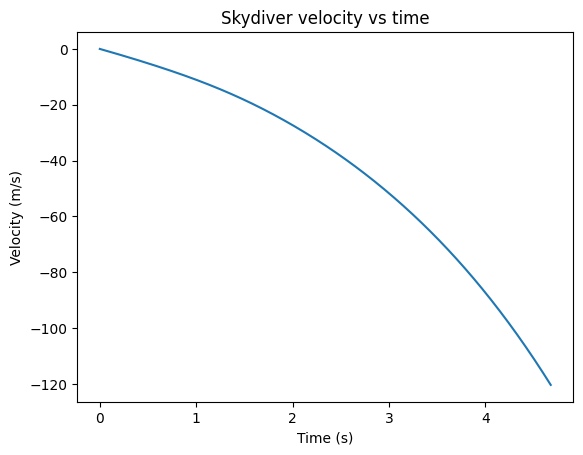

In [ ]:
# plot the velocity vs time
fig, axes = plt.subplots()

plt.plot(t, v)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Skydiver velocity vs time')


What is the approximate terminal speed of the skydiver before the parachute is deployed?  What about after?

In [ ]:
# You can look at the actually values of v (using `print(v[i])` at some appropirately chosen values of `i`)

Answer: Terminal speed without the parachute is ?? m/s, while with the parachute the it is ?? m/s.

Calculate and plot the acceleration of the skydiver (include axes labels with units).

* *Hint: you will need to calculate acceleration as the change in velocity divided by the change in time. You have already computed both velocity and time.*

In [ ]:
a = np.zeros_like(v)
N = len(a)
for i in range(N-1):
    a[i+1] = _

fig, axes = plt.subplots()
plt.plot(t,a)
plt.xlabel('')
plt.ylabel('')
plt.ylim(_, _)
plt.title('')

TypeError: float() argument must be a string or a real number, not 'Text'

What is the largest acceleration felt by the skydiver during his descent (express your answer as a multiple of g)?

In [ ]:
# the max() function returns the maximum of an array


Answer:  The largest acceleration felt is approximately ?? g.

----
###  Diagnostic information if not run on course server
Please include the following version information with your submission.

In [ ]:
%reload_ext version_information
%version_information jupyter, conda, numpy, scipy, matplotlib, sympy